In [229]:
# Importing libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np

plt.style.use('ggplot')

df = pd.read_excel(r'Datasets\AndesPlut.xls', skiprows= 1)

In [230]:
# Cleaning the dataset
df_major_ox = df.iloc[ : , : 14]

df_major_ox = df_major_ox.drop(columns = ['J', 'H2O'], axis= 1)  
df_major_ox.set_index( 'S$' , inplace= True)
df_major_ox.rename_axis('Sample', inplace= True)
df_major_ox
#df_major_ox[df_major_ox.isna().any(axis=1)]

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5
Sample,,,,,,,,,,,
T-SB-7.5,64.83,0.64,15.64,1.88,3.03,0.09,2.58,4.18,2.99,3.03,0.09
T-SB-7.4,67.02,0.58,15.39,2.11,2.87,0.09,2.33,3.89,2.93,3.36,0.08
T-SB-7.7,69.35,0.46,15.28,1.17,1.67,0.06,1.74,2.37,3.88,3.63,0.08
T-SB-7.6,71.36,0.41,14.98,1.71,0.89,0.07,1.05,1.75,4.26,3.81,0.08
T-C-7.1,60.00,0.79,17.15,3.20,3.42,0.11,2.82,6.31,2.86,2.06,0.25
...,...,...,...,...,...,...,...,...,...,...,...
C-V-B-47SW,50.04,0.75,19.96,9.82,NaN,0.12,5.75,9.36,1.10,0.17,0.11
C-V-B-A177,51.07,0.69,18.32,3.80,6.20,0.18,4.46,10.80,3.30,0.80,0.18
C-V-B-A188,50.09,0.73,18.83,3.80,6.30,0.18,4.86,10.42,3.26,0.58,0.14


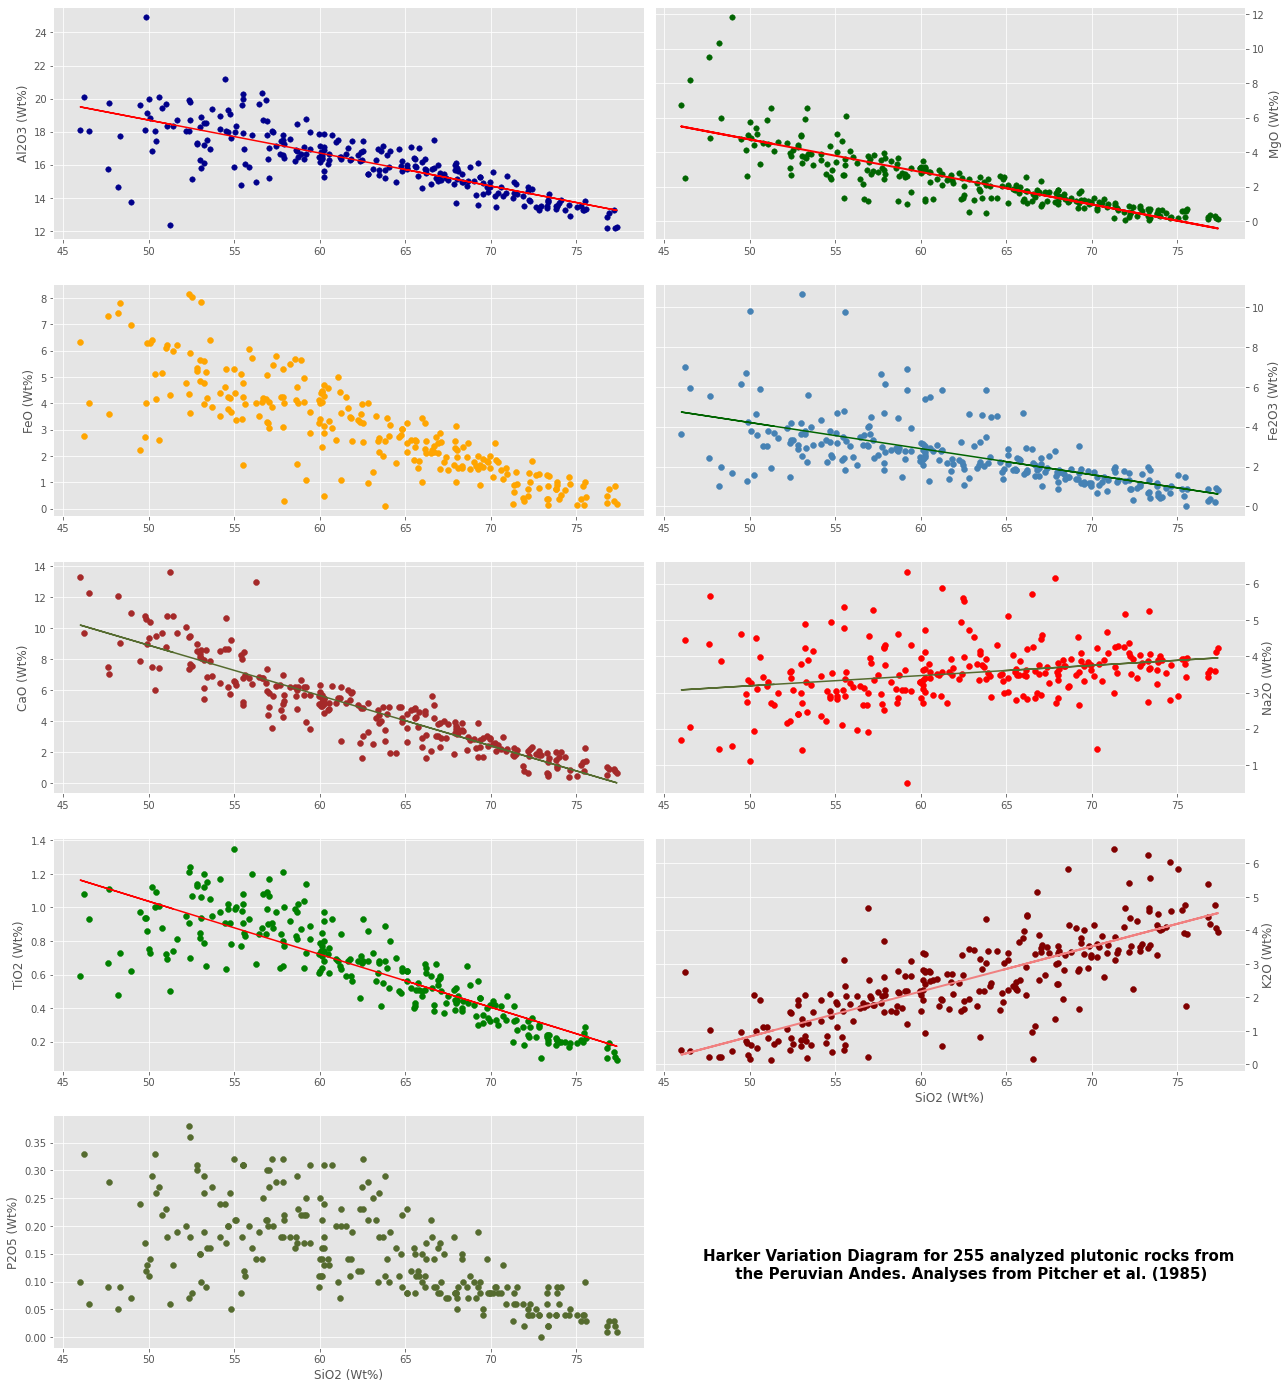

In [231]:
# Plotting of Harker Variation diagram
fig, ax = plt.subplots( 5, 2, sharex= False, sharey= False, figsize = (18,20))
fig.suptitle('Harker Variation Diagram for {} analyzed plutonic rocks from\n the Peruvian Andes. Analyses from Pitcher et al. (1985)'.format(len(df_major_ox.index)),
              x=0.75, y = 0.1, fontsize = 15,
              fontweight ="bold")

x = df_major_ox['SiO2']

ax[0,0].scatter( x, y = df_major_ox['Al2O3'], s= 30, color = 'darkblue' )
ax[0,0].set_ylabel('Al2O3 (Wt%)')

# Plotting the regression line
fit = np.polyfit(x, y = df_major_ox['Al2O3'], deg = 1)
ax[0,0].plot( x, fit[0] * x + fit[1], color='red')

ax[0,1].scatter( x, y = df_major_ox['MgO'], s= 30, color = 'darkgreen' )
ax[0,1].yaxis.set_ticks_position("right")
ax[0,1].set_ylabel('MgO (Wt%)')
ax[0,1].yaxis.set_label_position("right")
fit = np.polyfit(x, y = df_major_ox['MgO'], deg = 1)
ax[0,1].plot( x, fit[0] * x + fit[1], linewidth= 2, color='red')

ax[1,0].scatter( x, y = df_major_ox['FeO'], s= 35, color = 'orange' )
ax[1,0].set_ylabel('FeO (Wt%)')


ax[1,1].scatter( x, y = df_major_ox['Fe2O3'], s= 35, color = 'steelblue' )
ax[1,1].yaxis.set_ticks_position("right")
ax[1,1].set_ylabel('Fe2O3 (Wt%)')
ax[1,1].yaxis.set_label_position("right")
fit = np.polyfit(x, y = df_major_ox['Fe2O3'], deg = 1)
ax[1,1].plot( x, fit[0] * x + fit[1], color='darkgreen')

ax[2,0].scatter( x, y = df_major_ox['CaO'], s= 35, color = 'brown' )
ax[2,0].set_ylabel('CaO (Wt%)')
fit = np.polyfit(x, y = df_major_ox['CaO'], deg = 1)
ax[2,0].plot( x, fit[0] * x + fit[1], color='darkolivegreen')

ax[2,1].scatter( x, y = df_major_ox['Na2O'], s= 35, color = 'red' )
ax[2,1].yaxis.set_ticks_position("right")
ax[2,1].set_ylabel('Na2O (Wt%)')
ax[2,1].yaxis.set_label_position("right")
fit = np.polyfit(x, y = df_major_ox['Na2O'], deg = 1)
ax[2,1].plot( x, fit[0] * x + fit[1], color='darkolivegreen')

ax[3,0].scatter( x, y = df_major_ox['TiO2'], s= 35, color = 'green' )
ax[3,0].set_ylabel('TiO2 (Wt%)')
fit = np.polyfit(x, y = df_major_ox['TiO2'], deg = 1)
ax[3,0].plot( x, fit[0] * x + fit[1], color='red')

ax[3,1].scatter( x, y = df_major_ox['K2O'], s= 35, color = 'maroon' )
#ax[3,1].set_xticklabels(ax[3,1].get_xticks().tolist())
ax[3,1].yaxis.set_ticks_position("right")
ax[3,1].set_ylabel('K2O (Wt%)')
ax[3,1].yaxis.set_label_position("right")
ax[3,1].set_xlabel('SiO2 (Wt%)')
fit = np.polyfit(x, y = df_major_ox['K2O'], deg = 1)
ax[3,1].plot( x, fit[0] * x + fit[1], linewidth= 2, color='lightcoral')

ax4 = ax[4,0].scatter( x = df_major_ox['SiO2'], y = df_major_ox['P2O5'], s= 35, color = 'darkolivegreen' )
ax[4,0].set_ylabel('P2O5 (Wt%)')
ax[4,0].set_xlabel('SiO2 (Wt%)')
fit = np.polyfit(x, y = df_major_ox['P2O5'], deg = 1)
ax[4,0].plot( x, fit[0] * x + fit[1], color='khaki')

fig.delaxes(ax[4,1])

plt.tight_layout()